# Crime Rate Prediction using Prophet Time series #

In [1]:
#Install fbprophet
!python -m pip install prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from prophet import Prophet

c:\Users\subin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [10]:
# load the data
chicago_crime_df1 = pd.read_csv(
    "Chicago_Crimes_2001_to_2004.csv", on_bad_lines='skip'
)
chicago_crime_df2 = pd.read_csv(
    "Chicago_Crimes_2005_to_2007.csv", on_bad_lines='skip'
)
chicago_crime_df3 = pd.read_csv(
    "Chicago_Crimes_2008_to_2011.csv", on_bad_lines='skip'
)
chicago_crime_df4 = pd.read_csv(
    "Chicago_Crimes_2012_to_2017.csv", on_bad_lines='skip'
)

C:\Users\subin\AppData\Local\Temp\ipykernel_1584\4175453146.py:2: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_crime_df1 = pd.read_csv(


In [43]:
#concatenate the data into one dataframe
chicago_crime_df = pd.concat([chicago_crime_df1, chicago_crime_df2, chicago_crime_df3, chicago_crime_df4], ignore_index=False, axis=0)

In [44]:
chicago_crime_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [6]:
#plot the missing data
# plt.figure(figsize=(10,10))
# sns.heatmap(chicago_crime_df.isnull(), cbar=False)

In [45]:
# Remove the unnecessary columns
chicago_crime_df_dropped = chicago_crime_df.drop(
    [
        "Unnamed: 0",
        "Case Number",
        "ID",
        "IUCR",
        "X Coordinate",
        "Y Coordinate",
        "Updated On",
        "Year",
        "FBI Code",
        "Beat",
        "Ward",
        "Community Area",
        "Location",
        "District",
        "Latitude",
        "Longitude",
    ],
    inplace=False,
    axis=1,
)
chicago_crime_df_dropped.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False


In [46]:
chicago_crime_df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016.0,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016.0,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016.0,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016.0,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [48]:
chicago_crime_df_dropped.Date = pd.to_datetime(chicago_crime_df.Date, format="%m/%d/%Y %I:%M:%S %p") #convert to datetime

In [49]:
#Count the total counts of primary type of crime
chicago_crime_df_dropped['Primary Type'].value_counts() 

Primary Type
THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                90

**Data Visualization**

In [54]:
#   Plot the top 15 crimes
order_data = chicago_crime_df_dropped["Primary Type"].value_counts().iloc[:15].index
order_data = list(dict.fromkeys(order_data))
chicago_crime_df_dropped = chicago_crime_df_dropped.reset_index(drop=True)

<Axes: xlabel='count', ylabel='Primary Type'>

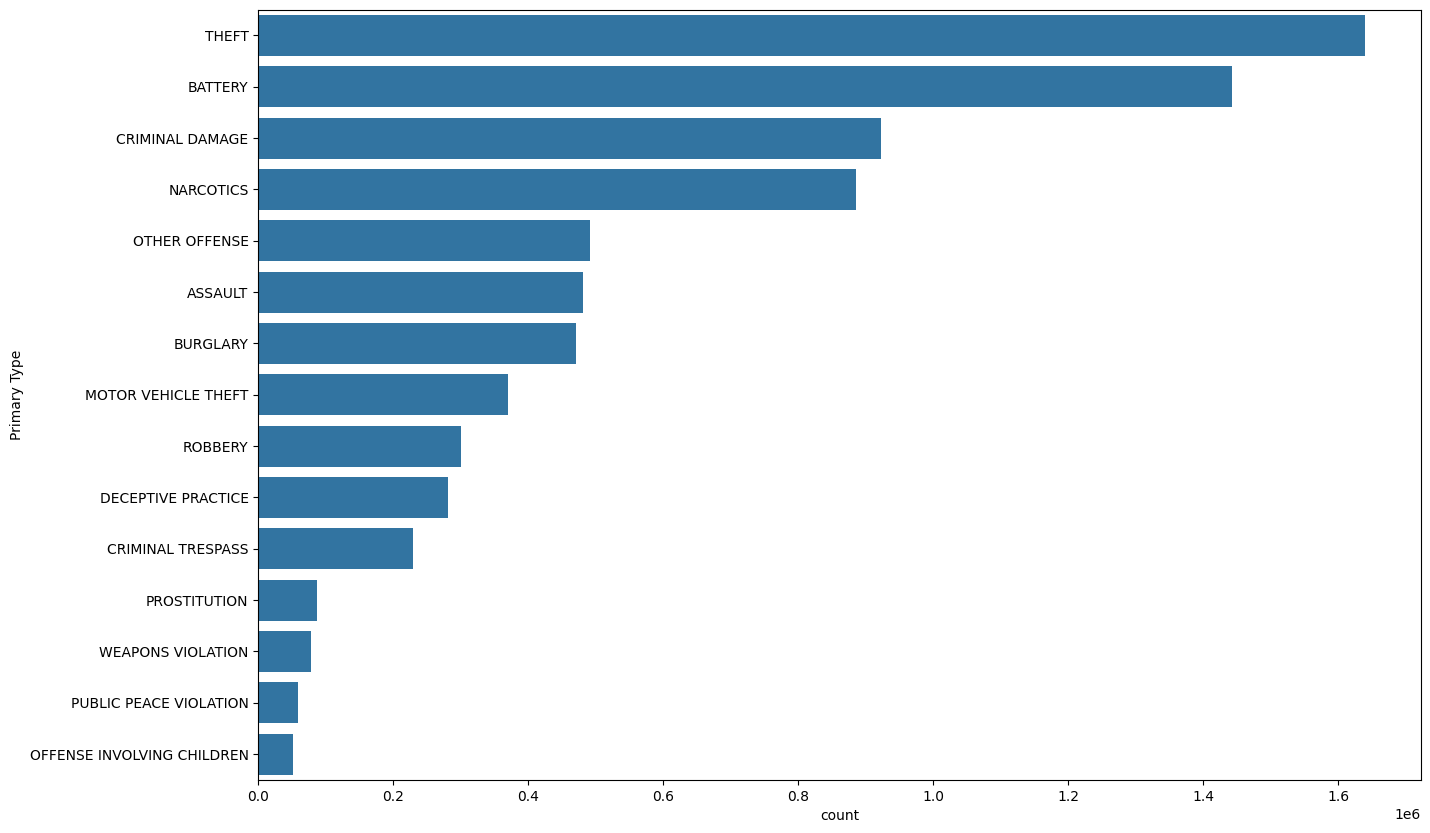

In [55]:
plt.figure(figsize=(15, 10))
sns.countplot(y="Primary Type", data=chicago_crime_df_dropped, order=order_data)

<Axes: xlabel='count', ylabel='Location Description'>

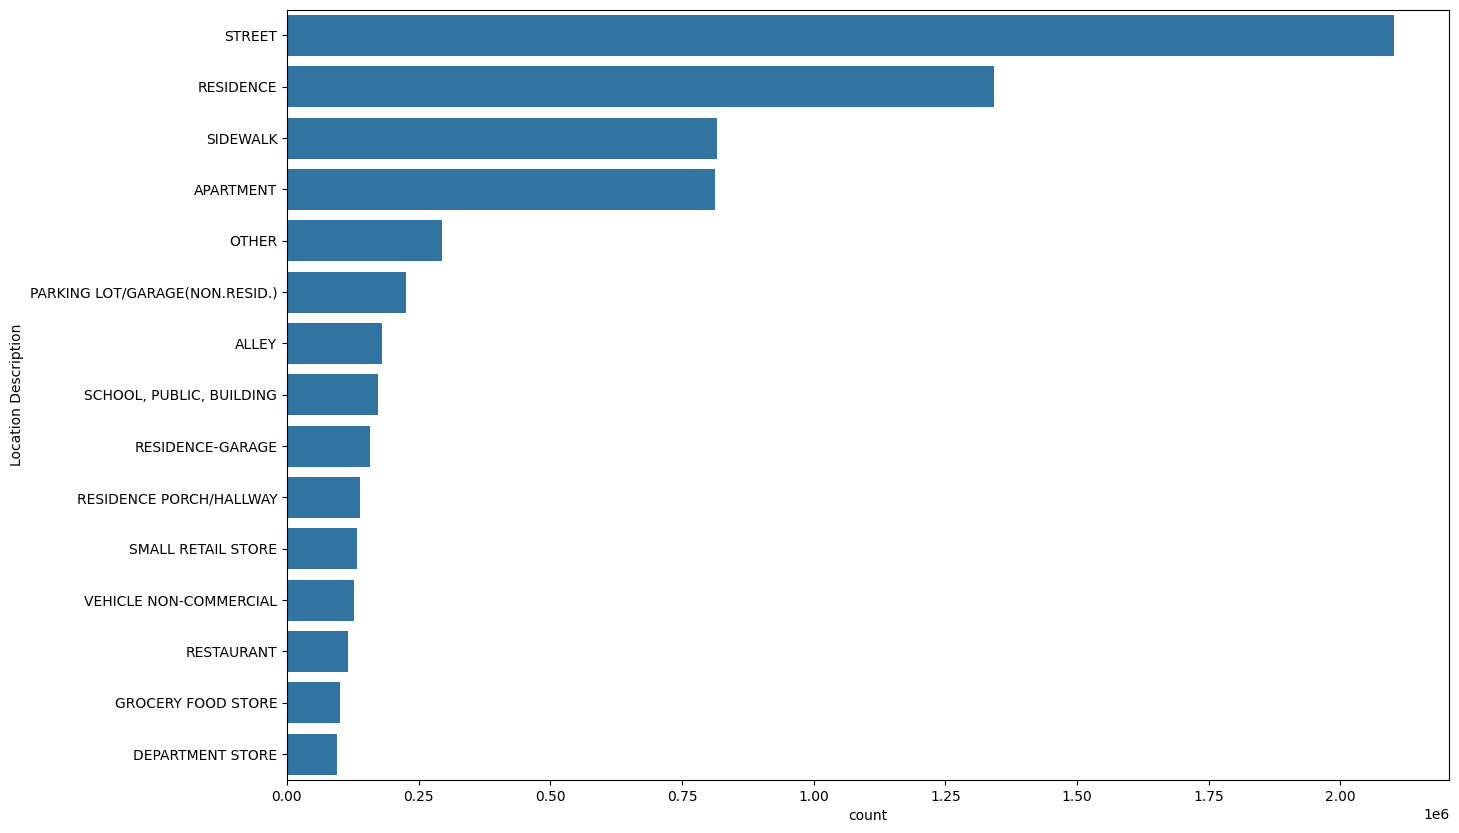

In [56]:
#Plot where the crimes are most likely to happen
plt.figure(figsize=(15, 10))
sns.countplot(y="Location Description", data=chicago_crime_df_dropped, order=chicago_crime_df_dropped["Location Description"].value_counts().iloc[:15].index)

C:\Users\subin\AppData\Local\Temp\ipykernel_1584\2111093726.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_crime_df_dropped.resample("Y").size())


Text(0, 0.5, 'Number of crimes')

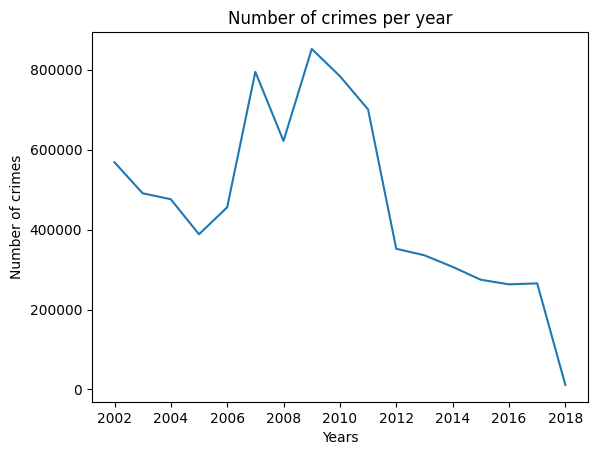

In [59]:
#Plot the crimes by year
chicago_crime_df_dropped.index = pd.DatetimeIndex(chicago_crime_df_dropped.Date)
plt.plot(chicago_crime_df_dropped.resample("Y").size())
plt.title("Number of crimes per year")
plt.xlabel("Years")
plt.ylabel("Number of crimes")

**Data Preparation**

In [63]:
#Resample the crimes by month
chichago_crime_prophet = chicago_crime_df_dropped.resample("ME").size().reset_index()
chichago_crime_prophet.columns = ["Date", "Crime Count"]

In [64]:
chichago_crime_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [66]:
#Rename the columns as ds and y
chichago_crime_prophet_df =  chichago_crime_prophet.rename(columns={'Date':'ds', 'Crime Count':'y'})
chichago_crime_prophet_df

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


**Predict**

In [67]:
model = Prophet() #instantiate the model
model.fit(chichago_crime_prophet_df) #fit the model

01:39:08 - cmdstanpy - INFO - Chain [1] start processing
01:39:08 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
future = model.make_future_dataframe(periods=1095) #forecast the future
forecast = model.predict(future) #predict the future

In [77]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40567.111750,22197.776875,54578.345771,40567.111750,40567.111750,-1574.603140,-1574.603140,-1574.603140,-1574.603140,-1574.603140,-1574.603140,0.0,0.0,0.0,38992.508610
1,2001-02-28,40714.391514,18555.141308,50335.952284,40714.391514,40714.391514,-6454.864803,-6454.864803,-6454.864803,-6454.864803,-6454.864803,-6454.864803,0.0,0.0,0.0,34259.526711
2,2001-03-31,40877.451253,23272.107331,55113.518470,40877.451253,40877.451253,-2068.131167,-2068.131167,-2068.131167,-2068.131167,-2068.131167,-2068.131167,0.0,0.0,0.0,38809.320086
3,2001-04-30,41035.251000,23294.781894,55370.817460,41035.251000,41035.251000,-1473.696754,-1473.696754,-1473.696754,-1473.696754,-1473.696754,-1473.696754,0.0,0.0,0.0,39561.554246
4,2001-05-31,41198.310739,28760.476061,60426.336225,41198.310739,41198.310739,3883.173080,3883.173080,3883.173080,3883.173080,3883.173080,3883.173080,0.0,0.0,0.0,45081.483819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2020-01-27,-1078.196172,-21400.269829,9591.721274,-2786.145370,551.419481,-3785.602250,-3785.602250,-3785.602250,-3785.602250,-3785.602250,-3785.602250,0.0,0.0,0.0,-4863.798422
1284,2020-01-28,-1092.182967,-20490.846159,11851.663094,-2802.122524,540.053021,-3084.305189,-3084.305189,-3084.305189,-3084.305189,-3084.305189,-3084.305189,0.0,0.0,0.0,-4176.488156
1285,2020-01-29,-1106.169763,-19213.019245,11909.830018,-2817.770939,529.353454,-2485.417668,-2485.417668,-2485.417668,-2485.417668,-2485.417668,-2485.417668,0.0,0.0,0.0,-3591.587430
1286,2020-01-30,-1120.156558,-18007.783198,12701.634799,-2834.835714,518.653887,-2015.752945,-2015.752945,-2015.752945,-2015.752945,-2015.752945,-2015.752945,0.0,0.0,0.0,-3135.909503


This plot shows the forecast prediction that is made by the model from 2017 to 2020

c:\Users\subin\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\subin\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


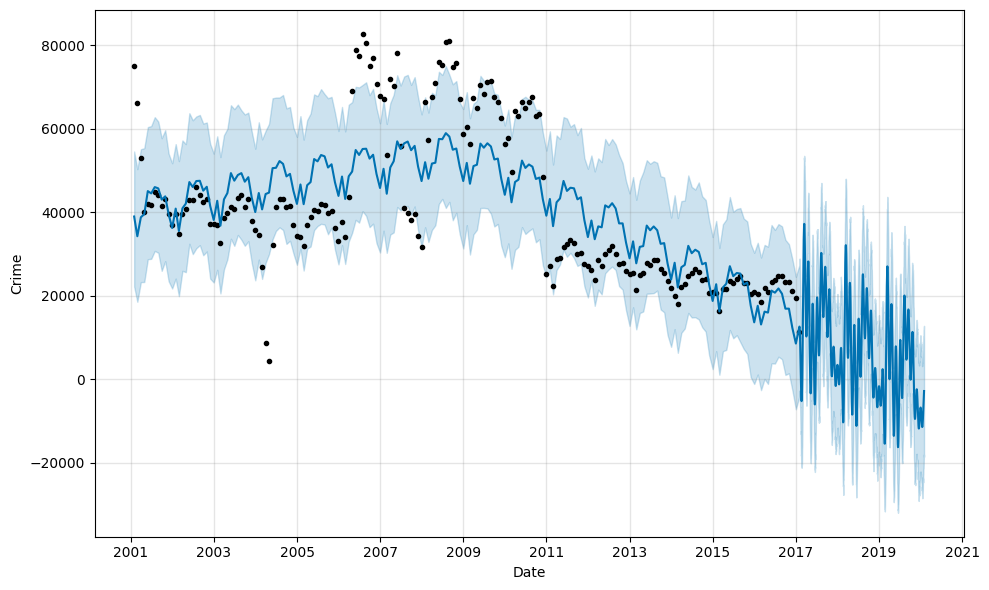

In [78]:
fig = model.plot(forecast, xlabel="Date", ylabel="Crime")  # plot the forecast

This plot shows the trend of the crimes in Chicago from 2001 to 2017. The plot shows that the crimes were increasing from 2001 to 2004, then decreased from 2004 to 2007, and then increased again from 2007 to 2011. The crimes decreased from 2011 to 2017. The plot also shows the forecast of the crimes from 2017 to 2020. The forecast shows that the crimes will decrease from 2017 to 2020.

c:\Users\subin\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\subin\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\subin\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

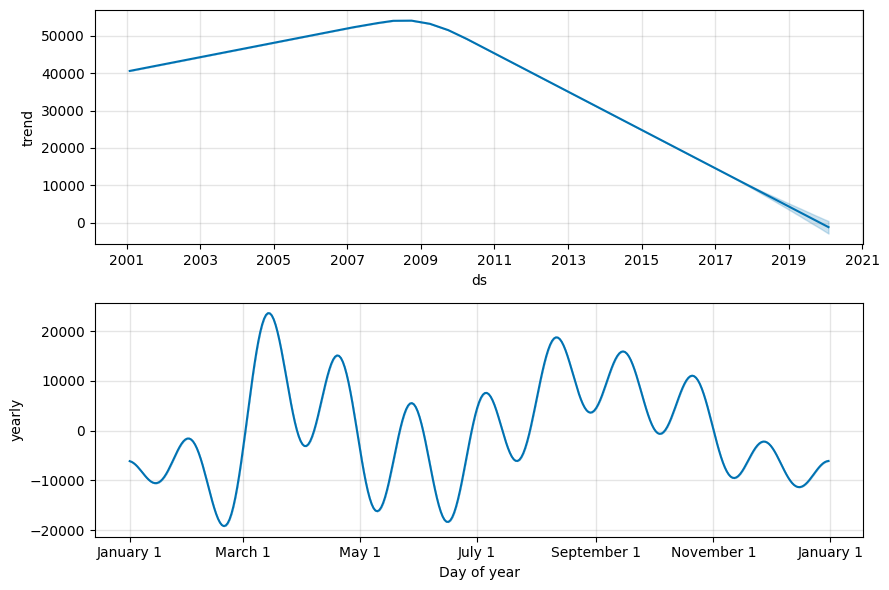

In [79]:
fig = model.plot_components(forecast) #plot the components